In [1]:
import math
#for plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("input14.txt") as f:
    data = f.read().splitlines()
config = []
for line in data:
    p, v = line.split()
    p, v = p.strip("p=").split(","), v.strip("v=").split(",")
    config.append((int(p[0]), int(p[1]), int(v[0]), int(v[1])))

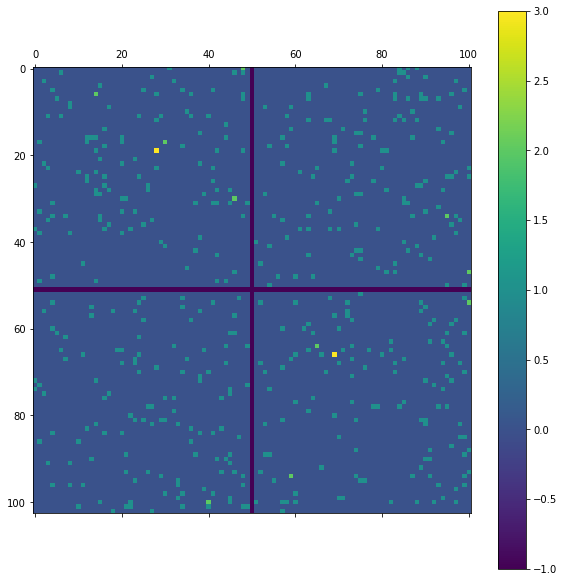

In [39]:
final_config = []
width, height = ((101, 103) if len(config) > 50 else (11,7))
for robot in config:
    final_config.append(( (robot[0] + 100 * robot[2])%width, (robot[1] + 100 * robot[3])%height))

grid = np.zeros((width, height), dtype=int)
for robot in final_config:
    grid[robot[0], robot[1]] += 1
grid[width//2, :], grid[:, height//2] = -1, -1
plt.rcParams["figure.figsize"] = (10,10)
plt.matshow(grid.T)
plt.colorbar();

In [38]:
quads = [0,0,0,0]
for robot in final_config:
    if   robot[0]<width//2 and robot[1]<height//2:
        quads[0]+=1
    elif robot[0]>width//2 and robot[1]<height//2:
        quads[1]+=1
    elif robot[0]<width//2 and robot[1]>height//2:
        quads[2]+=1
    elif robot[0]>width//2 and robot[1]>height//2:
        quads[3]+=1
quads, math.prod(quads)

([120, 128, 121, 124], 230461440)

Part II

What? Christmas tree??

In [3]:
init_place = []
width, height = ((101, 103) if len(config) > 50 else (11,7))
grid = np.zeros((width, height), dtype=int)

t=0
for robot in config:
    init_place.append((robot[0], robot[1]))
placemt = init_place.copy()

Ok, so at every 10403 the placements repeat:

In [358]:
width, height = ((101, 103) if len(config) > 50 else (11,7))

init_place = [(robot[0], robot[1]) for robot in config]

delta_t = 10403
placemt = [( (init_place[i][0] + delta_t*config[i][2])%width, (init_place[i][1] + delta_t*config[i][3])%height) for i in range(len(init_place))]
placemt == init_place

True

In [297]:
cycles = []

for i in range(len(placemt)//50):
    ith_hist = []
    for t in range(100000):
        placemt[i] = ( (placemt[i][0] + config[i][2])%width, (placemt[i][1] + config[i][3])%height)
        if placemt[i] in ith_hist:
            cycles.append(t)
            break
        ith_hist.append(placemt[i])
        print(i, t,"\r",end="")
cycles

[10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403, 10403]

We're not looking at 10k placements. How to catch the Christmas tree?

Animation: as .py, doesn't work as .ipynb. Check the Day14.py file for that
import matplotlib.animation as animation
%matplotlib notebook

I've tried an empty [:20,:20] upper quadrant, but not good, better at [:10,:10]

In [111]:
init_place = []
width, height = ((101, 103) if len(config) > 50 else (11,7))
grid = np.zeros((width, height), dtype=int)

t=0
for robot in config:
    init_place.append((robot[0], robot[1]))
placemt = init_place.copy()

plt.rcParams["figure.figsize"] = (10,10)

6668

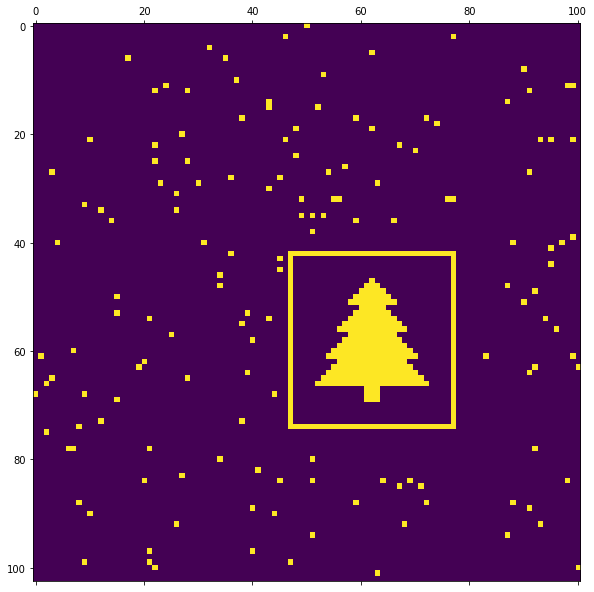

In [119]:
for _ in range(10403):
    t+=1
    grid = np.zeros((width, height), dtype=int)
    for i in range(len(placemt)):
        placemt[i] = ( (placemt[i][0] + config[i][2])%width, (placemt[i][1] + config[i][3])%height)
        grid[placemt[i]] += 1
    if (grid[:15,:15]==0).all():
        plt.matshow(grid.T, vmax=1)
        break
t

t= 1717 [30.14072992 17.87544058]


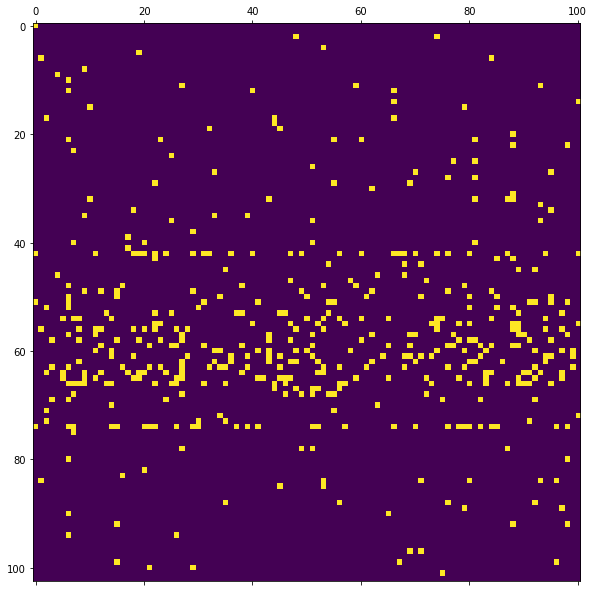

In [103]:
for _ in range(100):
    t+=1
    grid = np.zeros((width, height), dtype=int)
    for i in range(len(placemt)):
        placemt[i] = ( (placemt[i][0] + config[i][2])%width, (placemt[i][1] + config[i][3])%height)
    if (np.std(placemt, axis=0) < 25).any(): #typical std of 28~30
        for i in range(len(placemt)):
            grid[placemt[i]] += 1
        plt.matshow(grid.T, vmax=1)
        break
    
print("t=",t,np.std(placemt, axis=0))

Low entropy values:<br>
vertical: at t=2, t=103, t=204<br>
horizontal: at t=76, t=179, t=282<br>
Clearly, at 2+101$n$, 76+103$m$<br>
When do these coincide? 

In [80]:
for n in range(103):
    for m in range(101):
        if 2+101*n == 76+103*m:
            print(n,m, 2+101*n)
            break

66 64 6668


At 2+101 $\times$ 66 = 76+64 $\times$ 103 = 6668

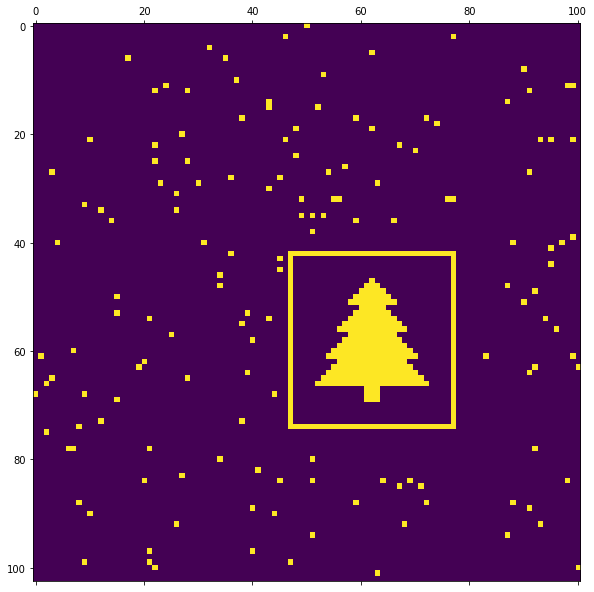

In [85]:
t = 6668
grid = np.zeros((width, height), dtype=int)
for i in range(len(placemt)):
    placemt[i] = ( (init_place[i][0] + t*config[i][2])%width, (init_place[i][1] + t*config[i][3])%height)
    grid[placemt[i]] += 1
plt.matshow(grid.T, vmax=1);